In [ ]:
# traditional KMeans recommending system
# src: https://dev.to/kuvambhardwaj/how-i-built-a-song-recommendation-system-with-python-scikit-learn-pandas-11ok

In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
tracks = pd.read_csv('../data/id_metadata.csv', sep='\t')
tracks

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
0,0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947
1,0010xmHR6UICBOYT,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096
2,002Jyd0vN4HyCpqL,273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693
3,006TYKNjNxWjfKjy,1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867
4,007LIJOPQ4Sb98qV,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067
...,...,...,...,...,...,...,...,...,...,...,...
109264,zzyyPUs7hC9Nz2e1,6IW5yPlWJYmXxRuuc7QkMx,36.0,2017,0.380,0.835,1.0,1.0,0.539,142.699,200880
109265,zzz0n04uuTUA7fNh,21pCToQdqcPi879auxjxKe,48.0,2014,0.572,0.503,6.0,0.0,0.553,103.215,262840
109266,zzzj3LYaZtYtbzSr,2SJ6FGmRPacKE9N4g4BRZU,21.0,2010,0.402,0.376,2.0,0.0,0.119,108.509,276507
109267,zzznMjZAKnJJXQSj,2ygfHXyt3gvyhvKrNJU61n,47.0,2017,0.532,0.977,10.0,0.0,0.966,116.527,224549


array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='tempo', ylabel='energy'>,
        <AxesSubplot:xlabel='valence', ylabel='energy'>],
       [<AxesSubplot:xlabel='danceability', ylabel='tempo'>,
        <AxesSubplot:xlabel='energy', ylabel='tempo'>,
        <AxesSubplot:xlabel='tempo', ylabel='tempo'>,
        <AxesSubplot:xlabel='valence', ylabel='tempo'>],
       [<AxesSubplot:xlabel='danceability', ylabel='valence'>,
        <AxesSubplot:xlabel='energy', ylabel='valence'>,
        <AxesSubplot:xlabel='tempo', ylabel='valence'>,
        <AxesSubplot:xlabel='valence', ylabel='valence'>]], dtype=object)

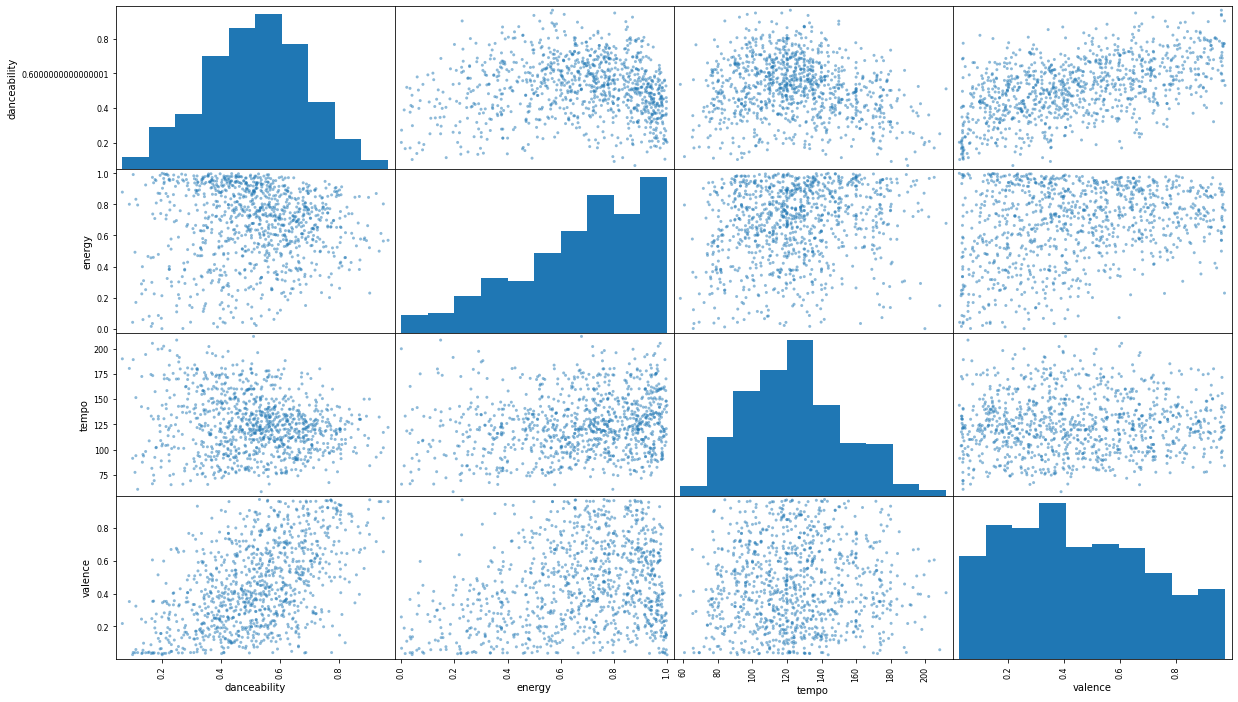

In [9]:
reduced = tracks[:1000]
pd.plotting.scatter_matrix(reduced[['danceability', 'energy', 'tempo', 'valence']], figsize=(20,12))

In [10]:
reduced.corr()

,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
popularity,1.000000,-0.013922,0.193746,0.013953,0.014647,0.019482,0.162936,0.035929,-0.061208
release,-0.013922,1.000000,0.081793,0.134726,-0.022475,-0.045310,-0.161905,0.064324,-0.022069
danceability,0.193746,0.081793,1.000000,0.003253,0.004288,-0.043201,0.511530,-0.158891,-0.142256
energy,0.013953,0.134726,0.003253,1.000000,0.017812,-0.024120,0.267734,0.176073,-0.065291
key,0.014647,-0.022475,0.004288,0.017812,1.000000,-0.140600,0.009273,-0.035810,0.024541
mode,0.019482,-0.045310,-0.043201,-0.024120,-0.140600,1.000000,0.038392,0.012690,-0.107355
valence,0.162936,-0.161905,0.511530,0.267734,0.009273,0.038392,1.000000,0.035974,-0.246435
tempo,0.035929,0.064324,-0.158891,0.176073,-0.035810,0.012690,0.035974,1.000000,-0.052074
duration_ms,-0.061208,-0.022069,-0.142256,-0.065291,0.024541,-0.107355,-0.246435,-0.052074,1.000000


In [11]:
model = KMeans(n_clusters=5)
model.fit(tracks[['danceability', 'energy', 'tempo', 'valence']])

KMeans(n_clusters=5)

In [12]:
print(model.labels_[:10],'\n\n', min(model.labels_))

[1 2 4 3 0 4 0 4 1 1] 

 0


In [13]:
tracks['type'] = model.labels_
tracks

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms,type
0,0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947,1
1,0010xmHR6UICBOYT,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096,2
2,002Jyd0vN4HyCpqL,273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693,4
3,006TYKNjNxWjfKjy,1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867,3
4,007LIJOPQ4Sb98qV,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109264,zzyyPUs7hC9Nz2e1,6IW5yPlWJYmXxRuuc7QkMx,36.0,2017,0.380,0.835,1.0,1.0,0.539,142.699,200880,4
109265,zzz0n04uuTUA7fNh,21pCToQdqcPi879auxjxKe,48.0,2014,0.572,0.503,6.0,0.0,0.553,103.215,262840,1
109266,zzzj3LYaZtYtbzSr,2SJ6FGmRPacKE9N4g4BRZU,21.0,2010,0.402,0.376,2.0,0.0,0.119,108.509,276507,1
109267,zzznMjZAKnJJXQSj,2ygfHXyt3gvyhvKrNJU61n,47.0,2017,0.532,0.977,10.0,0.0,0.966,116.527,224549,0


In [14]:
tracks.to_csv('../data/KMeans_result.csv')

In [15]:
KMeans_result = pd.read_csv('../data/KMeans_result.csv')

ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
# sample input: 1xK1Gg9SxG8fy2Ya373oqb,1xQ6trAsedVPCdbtDAmk0c,7ytR5pFWmSjzHJIeQkgog4,079Ey5uxL04AKPQgVQwx5h,0lizgQ7Qw35od7CYaoMBZb,7r9ZhitdQBONTFOiJW5mr8,3ee8Jmje8o58CHK66QrVC2,3ZG8N7aWw2meb6UrI5ZmnZ,5cpJFiNwYyWwFLH0V6B3N8,26w9NTiE9NGjW1ZvIOd1So,7BIy3EGQhg98CsRdKYHnJC,2374M0fQpWi3dLnB54qaLX,2IVsRhKrx8hlQBOWy4qebo,40riOy7x9W7GXjyGp4pjAv,4evmHXcjt3bTUHD1cvny97,0MF5QHFzTUM2dYm6J7Vngt,0TrPqhAMoaKUFLR7iYDokf,07KXEDMj78x68D884wgVEm,6gxKUmycQX7uyMwJcweFjp

# search the specified ids in this dataset and get the tracks
favorites = tracks[tracks.id.isin(ids)]

# code to sort find out the maximum occuring cluster number according to user's favorite track types
cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

# sort the cluster numbers and find out the number which occurs the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# finally get the tracks of that cluster
suggestions = tracks[tracks.type == user_favorite_cluster]

# now print the first 5 rows of the data frame having that cluster number as their type
print(suggestions.head())

Enter comma-separated ids of your favorite songs
> 0009fFIM1eYThaPg,00KSCJkYb8JKa4Y3,00XWljDxNBgBKEEA

Favorite cluster: 2 

                  id              spotify_id  popularity  release  \
1   0010xmHR6UICBOYT  27szvF97Tu95GxN98N52fy        46.0     2013   
14  00XWljDxNBgBKEEA  7rm6kcMbUZNMzkELONGaVY        59.0     2008   
24  0130k7BE0WlWUQLg  7MTNKuOblOwOYgffMo0ggT        20.0     2017   
48  01roaWOWaMzXjMOV  1Xf8aZynibVam74RQ2JMGW        32.0     2018   
50  021X4PPO8YyoVVkT  3NnWTwdPH1VBCWWmfpipFG        39.0     2010   

    danceability  energy   key  mode  valence    tempo  duration_ms  type  
1          0.591   0.513   7.0   0.0    0.263  172.208       325096     2  
14         0.219   0.323  10.0   1.0    0.339  170.437       248000     2  
24         0.322   0.941   0.0   1.0    0.274  161.991       172304     2  
48         0.505   0.858   4.0   1.0    0.777  185.024       180253     2  
50         0.253   0.949   1.0   1.0    0.667  193.194       209227     2  
